- understand 1st task

# Abstraction and Reasoning Starter Notebook

This notebook will get you started on on the basics of this competition

In [1]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

/kaggle/input
/kaggle/input/abstraction-and-reasoning-challenge
/kaggle/input/abstraction-and-reasoning-challenge/evaluation
/kaggle/input/abstraction-and-reasoning-challenge/test
/kaggle/input/abstraction-and-reasoning-challenge/training


I like to use the `Path` class for my paths.

In [3]:
from pathlib import Path

data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'

The `training` folder has 400 JSON tasks. The names of the first three are shown below.

In [4]:
training_tasks = sorted(os.listdir(training_path))
print(training_tasks[:3])

['007bbfb7.json', '00d62c1b.json', '017c7c7b.json']


In [5]:
print(len(training_tasks))
print(training_tasks, end="")

400
['007bbfb7.json', '00d62c1b.json', '017c7c7b.json', '025d127b.json', '045e512c.json', '0520fde7.json', '05269061.json', '05f2a901.json', '06df4c85.json', '08ed6ac7.json', '09629e4f.json', '0962bcdd.json', '0a938d79.json', '0b148d64.json', '0ca9ddb6.json', '0d3d703e.json', '0dfd9992.json', '0e206a2e.json', '10fcaaa3.json', '11852cab.json', '1190e5a7.json', '137eaa0f.json', '150deff5.json', '178fcbfb.json', '1a07d186.json', '1b2d62fb.json', '1b60fb0c.json', '1bfc4729.json', '1c786137.json', '1caeab9d.json', '1cf80156.json', '1e0a9b12.json', '1e32b0e9.json', '1f0c79e5.json', '1f642eb9.json', '1f85a75f.json', '1f876c06.json', '1fad071e.json', '2013d3e2.json', '2204b7a8.json', '22168020.json', '22233c11.json', '2281f1f4.json', '228f6490.json', '22eb0ac0.json', '234bbc79.json', '23581191.json', '239be575.json', '23b5c85d.json', '253bf280.json', '25d487eb.json', '25d8a9c8.json', '25ff71a9.json', '264363fd.json', '272f95fa.json', '27a28665.json', '28bf18c6.json', '28e73c20.json', '29623171

In each task, there are two dictionary keys, `train` and `test`. You learn the pattern from the train input-output pairs, and then apply the pattern to the `test` input, to predict an output.

In [6]:
task_file = str(training_path / '00d62c1b.json')

with open(task_file, 'r') as f:
    task = json.load(f)

print(task.keys())

dict_keys(['train', 'test'])


Tasks have multiple `train` input-output pairs. Most tasks have a single `test` input-output pair, although some have more than one.

In [7]:
n_train_pairs = len(task['train'])
n_test_pairs = len(task['test'])

print(f'task contains {n_train_pairs} training pairs')
print(f'task contains {n_test_pairs} test pairs')

task contains 5 training pairs
task contains 1 test pairs


Drilling into the first `train` input-output pair, we can see the grids are expressed as 2d lists with integers 0-9.

In [8]:
sum(sum(np.array(task['train'][0]['input'])))

18

In [9]:
display(task['train'][0]['input'])
display(task['train'][0]['output'])

[[0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0],
 [0, 3, 0, 3, 0, 0],
 [0, 0, 3, 0, 3, 0],
 [0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0]]

[[0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0],
 [0, 3, 4, 3, 0, 0],
 [0, 0, 3, 4, 3, 0],
 [0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0]]

## Function to plot the first train/test input/output pairs of a task

You can use this function to plot the first `train` and `test` grids. The color aligns with what is found on the ARC app. Note though, the ARC app presents the grids to scale, where these display the grids in the same size, regardless of their dimension.

In [10]:
def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    fig, axs = plt.subplots(1, 4, figsize=(15,15))
    axs[0].imshow(task['train'][0]['input'], cmap=cmap, norm=norm)
    axs[0].axis('off')
    axs[0].set_title('Train Input')
    axs[1].imshow(task['train'][0]['output'], cmap=cmap, norm=norm)
    axs[1].axis('off')
    axs[1].set_title('Train Output')
    axs[2].imshow(task['test'][0]['input'], cmap=cmap, norm=norm)
    axs[2].axis('off')
    axs[2].set_title('Test Input')
    axs[3].imshow(task['test'][0]['output'], cmap=cmap, norm=norm)
    axs[3].axis('off')
    axs[3].set_title('Test Output')
    plt.tight_layout()
    plt.show()

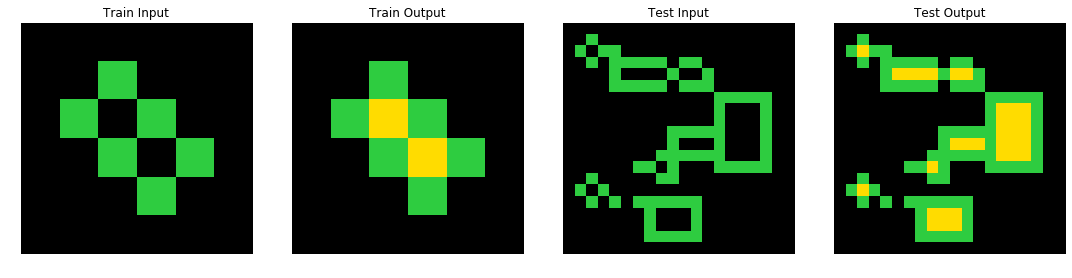

In [11]:
plot_task(task)

# evaluation data

In [12]:
evaluation_tasks = sorted(os.listdir(evaluation_path))
print(evaluation_tasks[:3])
print(len(evaluation_tasks))

evaluation_task_file = str(evaluation_path / '00576224.json')

with open(evaluation_task_file, 'r') as f:
    evaluation_task = json.load(f)
print(evaluation_task.keys())
print(len(evaluation_task["train"]))
print(len(evaluation_task["test"]))

display(evaluation_task['train'][0]['input'])
display(evaluation_task['train'][0]['output'])

['00576224.json', '009d5c81.json', '00dbd492.json']
400
dict_keys(['train', 'test'])
2
1


[[8, 6], [6, 4]]

[[8, 6, 8, 6, 8, 6],
 [6, 4, 6, 4, 6, 4],
 [6, 8, 6, 8, 6, 8],
 [4, 6, 4, 6, 4, 6],
 [8, 6, 8, 6, 8, 6],
 [6, 4, 6, 4, 6, 4]]

# test data

In [13]:
test_tasks = sorted(os.listdir(test_path))
print(test_tasks[:3])
print(len(test_tasks))

test_task_file = str(test_path / '00576224.json')

with open(test_task_file, 'r') as f:
    test_task = json.load(f)
print(test_task.keys())
print(len(test_task["train"]))
print(len(test_task["test"]))

display(test_task['train'][0]['input'])
display(test_task['train'][0]['output'])

['00576224.json', '009d5c81.json', '00dbd492.json']
100
dict_keys(['train', 'test'])
2
1


[[8, 6], [6, 4]]

[[8, 6, 8, 6, 8, 6],
 [6, 4, 6, 4, 6, 4],
 [6, 8, 6, 8, 6, 8],
 [4, 6, 4, 6, 4, 6],
 [8, 6, 8, 6, 8, 6],
 [6, 4, 6, 4, 6, 4]]

In [14]:
# all local test data in test path is included in evaluation path
print(len(set(evaluation_tasks)-set(test_tasks)))
print(len(set(test_tasks)-set(evaluation_tasks)))

300
0


In [15]:
print(len(set(training_tasks)-set(evaluation_tasks)))
print(len(set(evaluation_tasks)-set(training_tasks)))
print(len(set(training_tasks)-set(test_tasks)))
print(len(set(test_tasks)-set(training_tasks)))

400
400
400
100


# relationship

       task_name  train_length  test_length            input_dim  \
0  007bbfb7.json             5            1      [3, 3, 3, 3, 3]   
1  00d62c1b.json             5            1  [6, 10, 10, 10, 20]   
2  017c7c7b.json             3            1            [6, 6, 6]   
3  025d127b.json             2            1              [14, 8]   
4  045e512c.json             3            1         [21, 21, 21]   

            output_dim input_relation output_relation in_out_relation  
0      [9, 9, 9, 9, 9]     same_input     same_output     diff_in_out  
1  [6, 10, 10, 10, 20]     diff_input     diff_output     same_in_out  
2            [9, 9, 9]     same_input     same_output     diff_in_out  
3              [14, 8]     diff_input     diff_output     same_in_out  
4         [21, 21, 21]     same_input     same_output     same_in_out  
same_input    227
diff_input    173
Name: input_relation, dtype: int64
same_output    226
diff_output    174
Name: output_relation, dtype: int64
same_in_out   

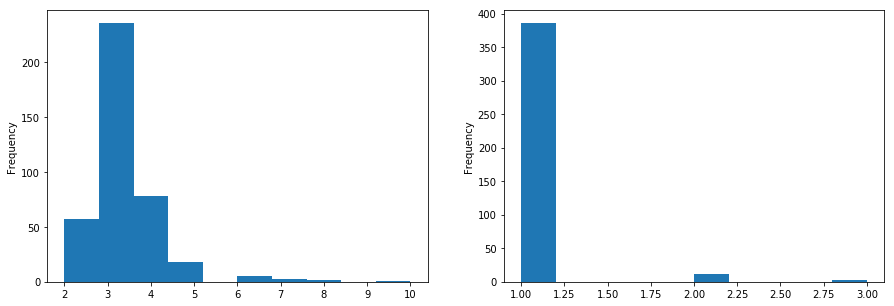

In [16]:
# relationship of input and output size
training_tasks = sorted(os.listdir(training_path))
task_name = []
train_length = []
test_length = []
input_relation = []
output_relation = []
in_out_relation = []
input_dim = []
output_dim = []
for i in range(len(training_tasks)):
    task_file = str(training_path / training_tasks[i])

    with open(task_file, 'r') as f:
        task = json.load(f)
        
    n_train_pairs = len(task['train'])
    n_test_pairs = len(task['test'])
    task_name.append(training_tasks[i]) #
    train_length.append(n_train_pairs) #
    test_length.append(n_test_pairs) #
    input_length = []
    output_length = []
    
    for j in range(n_train_pairs):
        input_length.append(np.array(task['train'][j]["input"]).shape[0])
        output_length.append(np.array(task['train'][j]["output"]).shape[0])
        
    if max(input_length) == min(input_length): #
        input_relation.append("same_input")
    else:
        input_relation.append("diff_input")
        
    if max(output_length) == min(output_length): #
        output_relation.append("same_output")
    else:
        output_relation.append("diff_output")
    
    diff_count = 0
    for k in range(len(input_length)): 
        if input_length[k] != output_length[k]: 
            diff_count += 1
            break
    if diff_count > 0:
        in_out_relation.append("diff_in_out")
    else:
        in_out_relation.append("same_in_out")
    input_dim.append(input_length)
    output_dim.append(output_length)

task = pd.DataFrame(task_name, columns=["task_name"])
task["train_length"] = train_length
task["test_length"] = test_length
task["input_dim"] = input_dim
task["output_dim"] = output_dim
task["input_relation"] = input_relation
task["output_relation"] = output_relation
task["in_out_relation"] = in_out_relation
print(task.head())

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
task.train_length.plot(kind="hist")
plt.subplot(1,2,2)
task.test_length.plot(kind="hist")
print(task.input_relation.value_counts())#.reset_index(drop=False).set_index(keys="index").plot(kind="hist")
print(task.output_relation.value_counts())
print(task.in_out_relation.value_counts())

# Using the correct prediction format

In [17]:
submission = pd.read_csv(data_path / 'sample_submission.csv', index_col='output_id')
display(submission.head())

,output
output_id,
00576224_0,|32|78| |32|78| |00|00|
009d5c81_0,|00000000000000|00000888888888|00000800080808|...
00dbd492_0,|00000000000222220000|02222222220200020000|020...
03560426_0,|0000000000|0000000000|0000000000|0000000000|0...
05a7bcf2_0,|000000000020000000080000000000|00000000002220...


The `output_id` is the `id` of the task, followed by the index of the `test` input that you should use to make your prediction. The `output` is the predicted output of the corresponding `test` input, reformatted into a string representation. (You can make three predictions per `output_id`, delineated by a space.) Use the following function to convert from a 2d python list to the string representation.

In [18]:
def flattener(pred):
    str_pred = str([row for row in pred])
    str_pred = str_pred.replace(', ', '')
    str_pred = str_pred.replace('[[', '|')
    str_pred = str_pred.replace('][', '|')
    str_pred = str_pred.replace(']]', '|')
    return str_pred

In [19]:
example_grid = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
display(example_grid)
print(flattener(example_grid))

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

|123|456|789|


# Re-creating the sample submission output

This demonstrates how to loop over the sample submission and make predictions.

In [20]:
for output_id in submission.index:
    task_id = output_id.split('_')[0]
    pair_id = int(output_id.split('_')[1])
    f = str(test_path / str(task_id + '.json'))
    with open(f, 'r') as read_file:
        task = json.load(read_file)
    # skipping over the training examples, since this will be naive predictions
    # we will use the test input grid as the base, and make some modifications
    data = task['test'][pair_id]['input'] # test pair input
    # for the first guess, predict that output is unchanged
    pred_1 = flattener(data)
    # for the second guess, change all 0s to 5s
    data = [[5 if i==0 else i for i in j] for j in data]
    pred_2 = flattener(data)
    # for the last gues, change everything to 0
    data = [[0 for i in j] for j in data]
    pred_3 = flattener(data)
    # concatenate and add to the submission output
    pred = pred_1 + ' ' + pred_2 + ' ' + pred_3 + ' ' 
    submission.loc[output_id, 'output'] = pred

submission.to_csv('submission.csv')

# manual coding for tasks

https://www.kaggle.com/nagiss/manual-coding-for-the-first-10-tasks

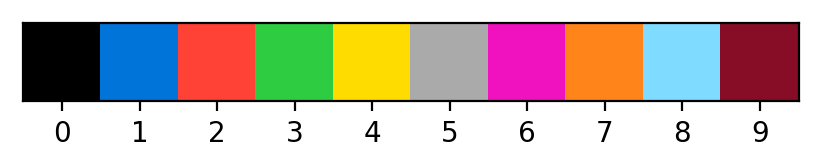

In [21]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [22]:
def get_data(task_filename):
    with open(task_filename, 'r') as f:
        task = json.load(f)
    return task

num2color = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]
color2num = {c: n for n, c in enumerate(num2color)}

In [23]:
def check(task, pred_func):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(3, n, figsize=(4*n,12), dpi=50)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in, t_out)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Train-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in, t_out)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Test-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1

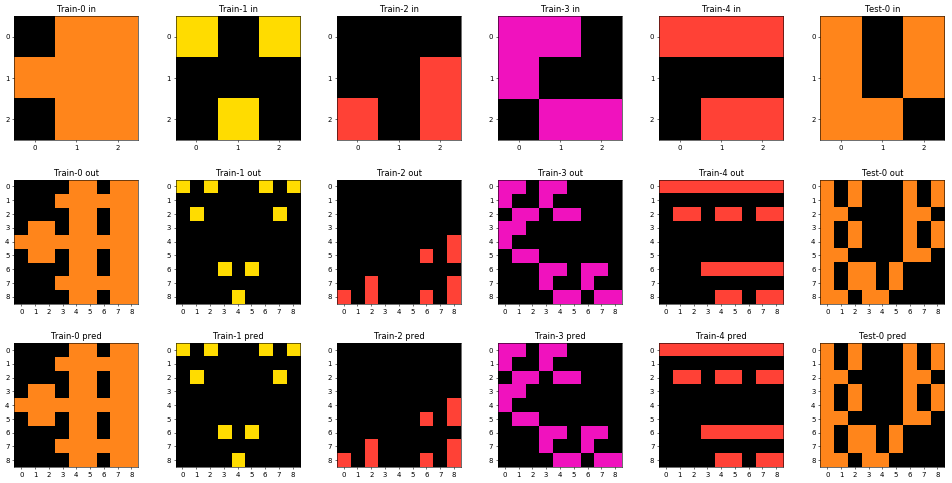

In [24]:
def task_train000(x, out):
    x_upsampled = x.repeat(3, axis=0).repeat(3, axis=1) # xの各要素をaxisで指定した軸方向にn回繰り返す
    x_tiled = np.tile(x, (3, 3)) # 3*3のタイル状に元画像を繰り返す
    y = x_upsampled & x_tiled
    return y

task = get_data(str(training_path / training_tasks[0]))
check(task, task_train000)

# create_df

In [25]:
def create_df(folder_path):
    task_names_list = sorted(os.listdir(folder_path))
    task_list = []
    for task_name in task_names_list: 
        task_file = str(folder_path / task_name)
        with open(task_file, 'r') as f:
            task = json.load(f)
            task_list.append(task)
    
    df = pd.DataFrame()
    df['task_name'] = task_names_list
    df['task'] = task_list
    df['number_of_train_pairs'] = df['task'].apply(lambda x: len(x['train']))
    df['number_of_test_pairs'] = df['task'].apply(lambda x: len(x['test']))
    
    # Compare image sizes
    df['inputs_all_have_same_height'] = df['task'].apply(
        lambda task: int(len(set([len(example['input']) for example in task['train']])) == 1)
    )
    df['inputs_all_have_same_width'] = df['task'].apply(
        lambda task: int(len(set([len(example['input'][0]) for example in task['train']])) == 1)
    )
    df['inputs_all_have_same_shape'] = df['inputs_all_have_same_height'] * df['inputs_all_have_same_width']
    df['input_height_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['input'])
                     if (len(set([len(example['input']) for example in task['train']])) == 1)
                     else np.nan
    )
    df['input_width_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['input'][0])
                     if (len(set([len(example['input'][0]) for example in task['train']])) == 1)
                     else np.nan
    )
    df['outputs_all_have_same_height'] = df['task'].apply(
        lambda task: int(len(set([len(example['output']) for example in task['train']])) == 1)
    )
    df['outputs_all_have_same_width'] = df['task'].apply(
        lambda task: int(len(set([len(example['output'][0]) for example in task['train']])) == 1)
    )
    df['outputs_all_have_same_shape'] = df['outputs_all_have_same_height'] * df['outputs_all_have_same_width']
    df['output_height_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['output'])
                     if (len(set([len(example['output']) for example in task['train']])) == 1)
                     else np.nan
    )
    df['output_width_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['output'][0])
                     if (len(set([len(example['output'][0]) for example in task['train']])) == 1)
                     else np.nan
    )  
    df['in_each_pair_shape_doesnt_change'] = df['task'].apply(
        lambda task: np.prod([int(len(example['input'][0])==len(example['output'][0])
                                  and len(example['input'])==len(example['output'])
                                 ) for example in task['train']
                            ])
    )
    df['in_each_pair_shape_ratio_is_the_same'] = df['task'].apply(
        lambda task: (len(set([len(example['input'][0]) / len(example['output'][0])
                                 for example in task['train']]))==1) * (
                      len(set([len(example['input']) / len(example['output'])
                                 for example in task['train']]))==1)
    )
    df['o/i_height_ratio_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['output']) / len(task['train'][0]['input'])
                     if (len(set([len(example['input']) / len(example['output'])
                                 for example in task['train']]))==1)
                     else np.nan
    )
    df['o/i_width_ratio_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['output'][0]) / len(task['train'][0]['input'][0])
                     if (len(set([len(example['input'][0]) / len(example['output'][0])
                                 for example in task['train']]))==1)
                     else np.nan
    )
    
    # my idea ---------
    df["same_color_sum"] = df['task'].apply(lambda task: 
                        np.all([int(sum(sum(np.array(example['input'])))== sum(sum(np.array(example['output'])))) for example in task['train']]))
    
    df["same_color_sum_in_edge"] = df['task'].apply(lambda task: 
                        np.all([int(sum(np.array(example['input'])[0,:]) +sum(np.array(example['input'])[:,0]) + 
                                    sum(np.array(example['input'])[-1,:]) +sum(np.array(example['input'])[:,-1])
                                    == 
                                    sum(np.array(example['output'])[0,:]) +sum(np.array(example['output'])[:,0]) + 
                                    sum(np.array(example['output'])[-1,:]) +sum(np.array(example['output'])[:,-1])) for example in task['train']]))
    
    #df["color_sum_ratio"] = df['task'].apply(lambda task: sum(sum(np.array(task['train'][0]['input'])))/sum(sum(np.array(task['train'][0]['output'])))
    #                    )

    #df["color_kind_diff"] = df["task"].apply(lambda task: len(np.unique(np.array(task['train'][0]['input'])))
    #                                         -len(np.unique(np.array(task['train'][0]['output']))))
    

    return df


training_descriptive_df = create_df(training_path)
evaluation_descriptive_df = create_df(evaluation_path)
test_descriptive_df = create_df(test_path)

In [26]:
def plot_one(ax, i,train_or_test,input_or_output):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)    
    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(train_or_test + ' '+input_or_output)
    
def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """    
    num_train = len(task['train'])
    fig, axs = plt.subplots(2, num_train, figsize=(3*num_train,3*2))
    for i in range(num_train):     
        plot_one(axs[0,i],i,'train','input')
        plot_one(axs[1,i],i,'train','output')        
    plt.tight_layout()
    plt.show()    
    
    num_test = len(task['test'])
    fig, axs = plt.subplots(2, num_test, figsize=(3*num_test,3*2))
    if num_test==1: 
        plot_one(axs[0],0,'test','input')
        plot_one(axs[1],0,'test','output')     
    else:
        for i in range(num_test):      
            plot_one(axs[0,i],i,'test','input')
            plot_one(axs[1,i],i,'test','output')  
    plt.tight_layout()
    plt.show()

In [27]:
for i in list(tmp["task_name"]):
    task_file = str(training_path / i)
    with open(task_file, 'r') as f:
        task = json.load(f)
    print(i)
    plot_task(task)

NameError: name 'tmp' is not defined

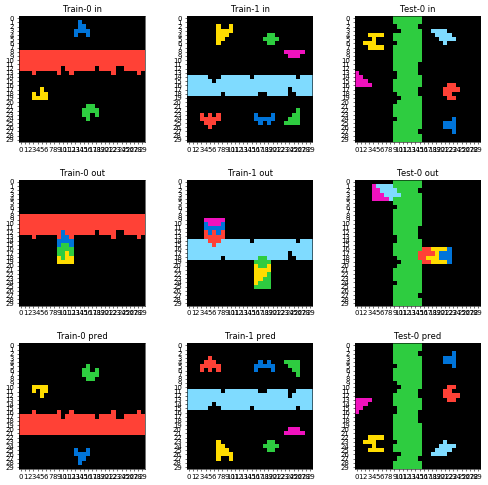

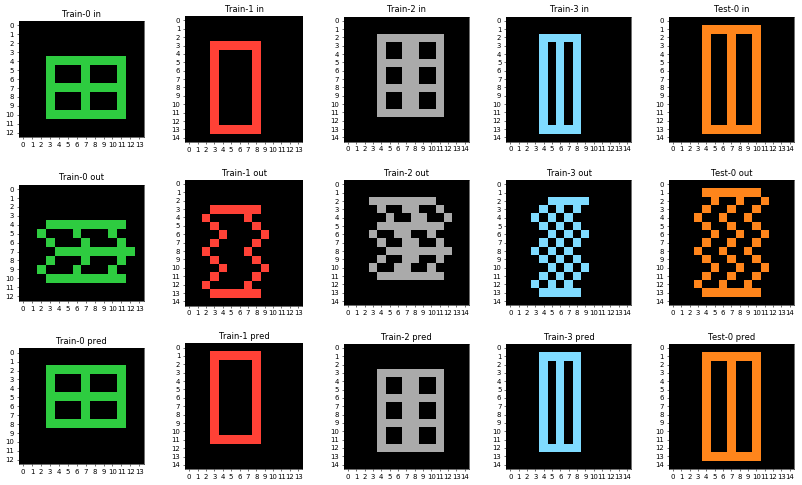

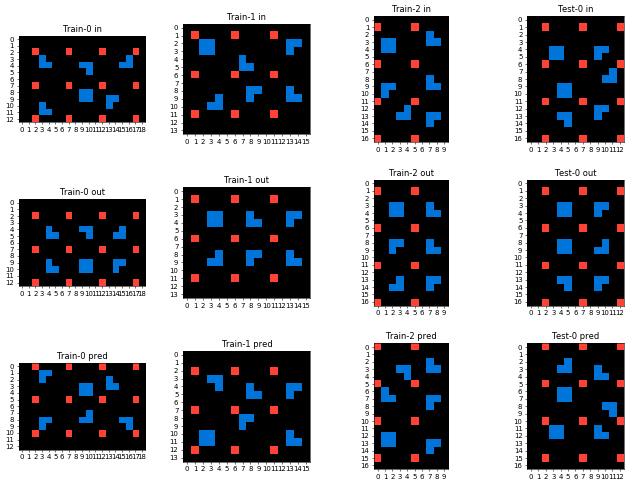

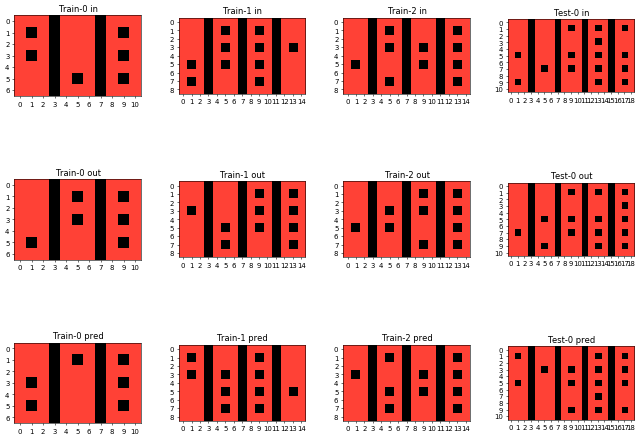

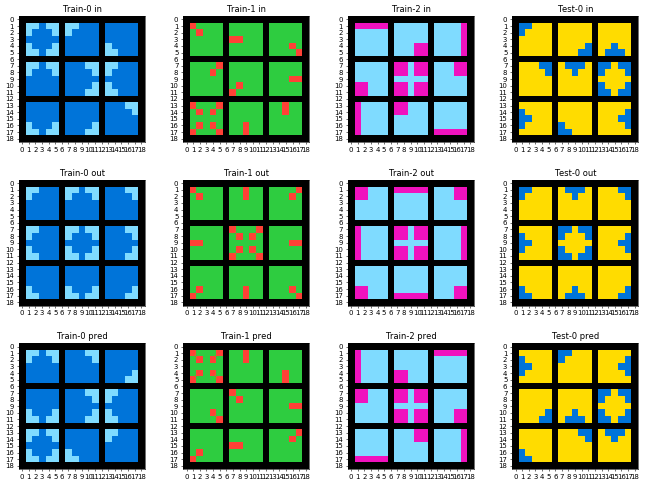

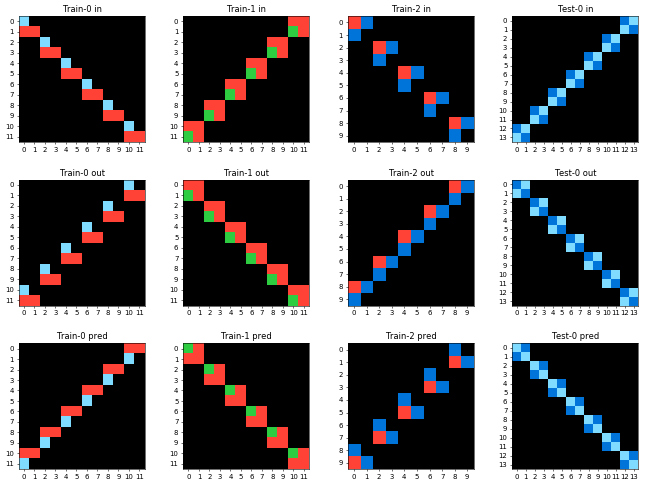

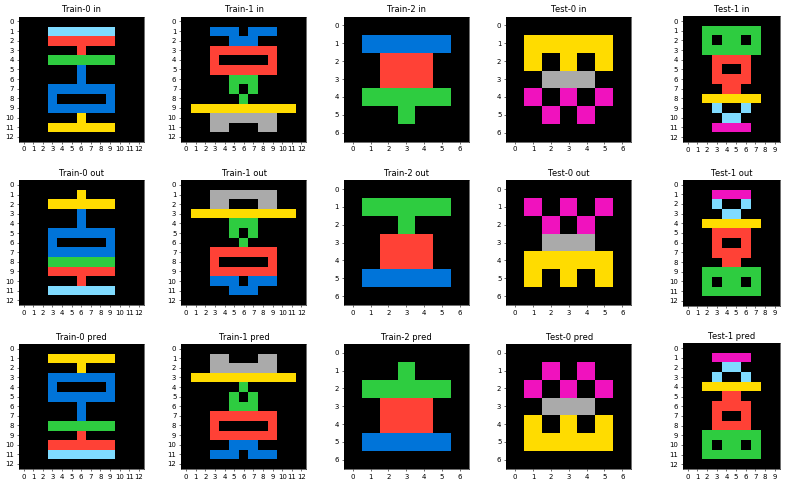

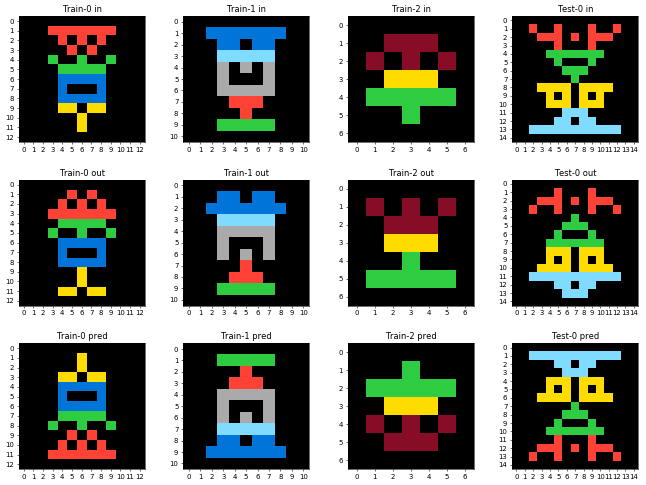

In [28]:
# 反転系(同次元)のhandcode
# https://note.nkmk.me/python-numpy-rot90/
# https://note.nkmk.me/python-numpy-flip-flipud-fliplr/

def rotation_task(x, out):
    if np.array_equal(np.rot90(np.array(x)),np.array(out)): #90度反時計回り
        ans = np.rot90(np.array(x))
    elif np.array_equal(np.rot90(np.array(x), 2), np.array(out)): #180度反時計回り
        ans = np.rot90(np.array(x), 2) 
    elif np.array_equal(np.rot90(np.array(x), 3), np.array(out)): #270度反時計回り
        ans = np.rot90(np.array(x), 3)
    elif np.array_equal(np.rot90(np.array(x),-1), np.array(out)): #90度時計回り
        ans = np.rot90(np.array(x),-1)
    elif np.array_equal(np.rot90(np.array(x), -2), np.array(out)): #180度時計回り
        ans = np.rot90(np.array(x), -2)
    elif np.array_equal(np.rot90(np.array(x), -3), np.array(out)): #270度時計回り
        ans = np.rot90(np.array(x), -3) 
    elif np.array_equal(np.fliplr(np.array(x)), np.array(out)): #左右反転
        ans = np.fliplr(np.array(x))
    elif np.array_equal(np.flipud(np.array(x)), np.array(out)): #上下反転
        ans = np.flipud(np.array(x))
    elif np.array_equal(np.transpose(np.array(x)), np.array(out)): #転置
        ans = np.transpose(np.array(x))
    else:
        ans = np.flipud(np.array(x))
    return ans

tmp = evaluation_descriptive_df[evaluation_descriptive_df.same_color_sum==1] #これだとevaluationでうまく行かない
tmp = tmp[tmp.same_color_sum_in_edge ==1]
tmp = tmp[tmp.in_each_pair_shape_doesnt_change==1]

for i in tmp["task_name"]:
    task = get_data(str(evaluation_path / i))
    check(task, rotation_task)